In [100]:
import re
import feather
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

pd.options.display.max_columns = 100

In [47]:
pd.options.display.max_rows = 100

In [4]:
full_df = feather.read_dataframe('../data/processed/train_df.feather')

In [6]:
full_df.shape

(7449443, 27)

In [7]:
full_df['label'].value_counts(1)

benign      0.998858
phishing    0.001142
Name: label, dtype: float64

In [8]:
df = full_df.sample(frac=0.2).reset_index(drop=True)
df.shape

(1489889, 27)

In [9]:
df['label'].value_counts(1)

benign      0.998843
phishing    0.001157
Name: label, dtype: float64

In [10]:
df.head()

,url,label,subdomain,domain,suffix,hostname,path,query,subdomain_null_ind,subdomain_www_ind,length_url,length_domain,length_path,domain_dot_cnt,url_slash_cnt,path_dot_cnt,hostname_dash_cnt,url_digit_cnt,url_special_char_cnt,url_reserved_char_cnt,url_hex_pattern_ind,hostname_entropy,url_entropy,php_ind,abuse_ind,admin_ind,verification_ind
0,https://casalalapicera.com/categoria/marcas/,benign,,casalalapicera,com,.casalalapicera.com,/categoria/marcas/,None,1,0,44,14,18,0,5,0,0,0,7,6,0,3.176110,3.686403,0,0,0,0
1,https://catalogue-lumiere.com/regates-retour/,benign,,catalogue-lumiere,com,.catalogue-lumiere.com,/regates-retour/,None,1,0,45,17,16,0,4,0,1,0,8,5,0,3.606937,3.949985,0,0,0,0
2,https://www.ceriseclub.com/avis/bijouxbylola,benign,www,ceriseclub,com,www.ceriseclub.com,/avis/bijouxbylola,None,0,1,44,10,18,0,4,0,0,0,7,5,0,3.419382,4.293881,0,0,0,0
3,https://www.catholiccastmedia.com/home/cross-1...,benign,www,catholiccastmedia,com,www.catholiccastmedia.com,/home/cross-1264110-overlay/,None,0,1,61,17,28,0,5,0,0,7,17,6,0,3.543465,4.412649,0,0,0,0
4,https://auction.catawiki.com/kavels/30855213-f...,benign,auction,catawiki,com,auction.catawiki.com,/kavels/30855213-france-stock-of-red-cross-boo...,None,0,0,84,8,56,0,4,0,0,9,24,5,0,3.308695,4.530369,0,0,0,0


In [101]:
df['protocol'] = df['url'].apply(lambda x: x.split('://')[0])

In [102]:
good_df = df[df['label'] == 'benign']
bad_df = df[df['label'] == 'phishing']

In [16]:
len(good_df), len(bad_df)

(1488165, 1724)

# EDA

In [11]:
df.describe()

,subdomain_null_ind,subdomain_www_ind,length_url,length_domain,length_path,domain_dot_cnt,url_slash_cnt,path_dot_cnt,hostname_dash_cnt,url_digit_cnt,url_special_char_cnt,url_reserved_char_cnt,url_hex_pattern_ind,hostname_entropy,url_entropy,php_ind,abuse_ind,admin_ind,verification_ind
count,1.489889e+06,1.489889e+06,1.489889e+06,1.489889e+06,1.489889e+06,1.489889e+06,1.489889e+06,1.489889e+06,1.489889e+06,1.489889e+06,1.489889e+06,1.489889e+06,1.489889e+06,1.489889e+06,1.489889e+06,1.489889e+06,1.489889e+06,1.489889e+06,1.489889e+06
mean,3.058832e-01,5.160895e-01,7.131759e+01,1.140411e+01,3.748538e+01,5.638004e-05,4.720105e+00,3.617189e-01,1.095947e-01,5.939263e+00,2.021893e+01,6.508359e+00,5.080848e-02,3.348631e+00,4.329695e+00,7.108382e-02,3.228428e-04,1.371243e-03,3.423074e-05
std,4.607806e-01,4.997412e-01,4.372083e+01,5.131486e+00,3.284613e+01,1.300527e-02,1.719464e+00,5.124572e-01,3.838287e-01,1.050420e+01,2.403302e+01,2.968818e+00,2.196065e-01,3.236509e-01,2.880826e-01,2.569649e-01,1.796493e-02,3.700491e-02,5.850606e-03
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,4.600000e+01,8.000000e+00,1.600000e+01,0.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+01,5.000000e+00,0.000000e+00,3.155639e+00,4.139071e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.000000e+00,1.000000e+00,6.200000e+01,1.100000e+01,2.800000e+01,0.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00,3.000000e+00,1.500000e+01,6.000000e+00,0.000000e+00,3.375000e+00,4.315312e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,1.000000e+00,1.000000e+00,8.500000e+01,1.500000e+01,5.000000e+01,0.000000e+00,5.000000e+00,1.000000e+00,0.000000e+00,8.000000e+00,2.300000e+01,7.000000e+00,0.000000e+00,3.576618e+00,4.512944e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,1.000000e+00,1.000000e+00,3.287000e+03,5.200000e+01,1.787000e+03,3.000000e+00,3.800000e+01,1.300000e+01,1.000000e+01,1.144000e+03,2.110000e+03,1.970000e+02,1.000000e+00,4.688499e+00,6.028824e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


## Correlation plot

In [ ]:
corr = df.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr)

## Distros

In [24]:
def plot_hist_overlay(col, n_bins=20):
    val_min = df[col].min()
    val_max = df[col].max()
    
    bins = np.linspace(val_min, val_max, n_bins)
    plt.hist([good_df[col], bad_df[col]], bins, density=True, label=['good', 'bad'], alpha=0.5)
    plt.legend()
    plt.xlabel(col)
    plt.ylabel('Fraction');

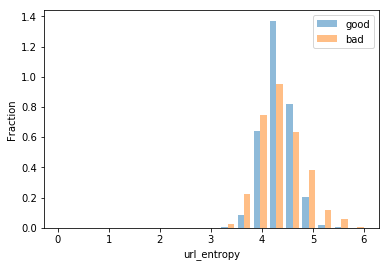

In [25]:
plot_hist_overlay('url_entropy')

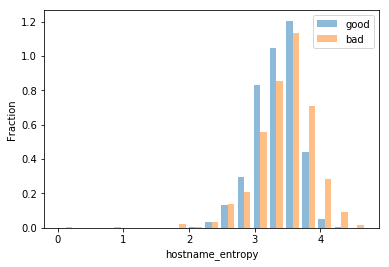

In [26]:
plot_hist_overlay('hostname_entropy')

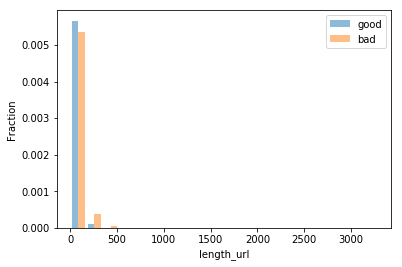

In [27]:
plot_hist_overlay('length_url')

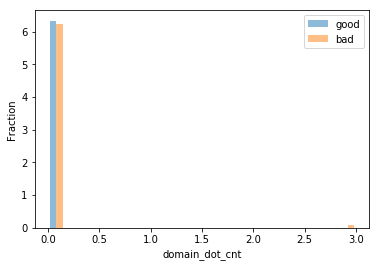

In [114]:
plot_hist_overlay('domain_dot_cnt')

In [115]:
good_df['domain_dot_cnt'].describe()

count    1488165.0
mean           0.0
std            0.0
min            0.0
25%            0.0
50%            0.0
75%            0.0
max            0.0
Name: domain_dot_cnt, dtype: float64

In [116]:
bad_df['domain_dot_cnt'].describe()

count    1724.000000
mean        0.048724
std         0.379317
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         3.000000
Name: domain_dot_cnt, dtype: float64

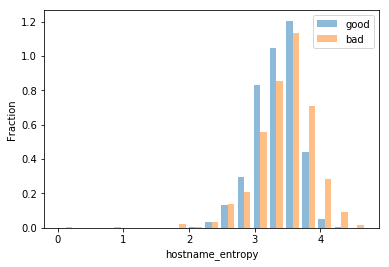

In [117]:
plot_hist_overlay('hostname_entropy')

In [28]:
from scipy import stats

In [30]:
stats.ttest_ind(good_df['length_url'], bad_df['length_url'])

Ttest_indResult(statistic=-4.36784739823145, pvalue=1.254855651051436e-05)

In [32]:
num_cols = df.select_dtypes(exclude=['object'])
non_cnt_cols = [col for col in num_cols if re.search('_ind', col) is None]

In [33]:
res_dict = {}
for col in non_cnt_cols:
    res_dict[col] = stats.ttest_ind(good_df[col], bad_df[col])    

In [111]:
res_df = pd.DataFrame(res_dict).T
res_df.columns=['t-statistic', 'p-val']

In [112]:
res_df.sort_values(by='p-val', ascending=False)

,t-statistic,p-val
url_entropy,-3.757208,1.718262e-04
length_url,-4.367847,1.254856e-05
length_domain,5.821820,5.822194e-09
length_path,6.282314,3.336629e-10
url_special_char_cnt,-9.512533,1.863369e-21
url_slash_cnt,-9.874366,5.385971e-23
url_reserved_char_cnt,-12.383939,3.205601e-35
hostname_entropy,-14.610979,2.409083e-48
path_dot_cnt,-15.255809,1.520024e-52
url_digit_cnt,-20.479707,3.364454e-93


## Chi-Squared

`chi2_contingency` computes chi-squared stastic and p-value for independence hypothesis test for a contingency table. A contingency table, or cross-tabulation, lists the observations by category. Guideline: observed & expected frequ > 5 (for all cells).

 

Refs:

- http://lagrange.univ-lyon1.fr/docs/scipy/0.17.1/generated/scipy.stats.chi2_contingency.html

- https://en.wikipedia.org/wiki/Contingency_table


In [38]:
from scipy.stats import chi2_contingency

In [103]:
df.columns

Index(['url', 'label', 'subdomain', 'domain', 'suffix', 'hostname', 'path',
       'query', 'subdomain_null_ind', 'subdomain_www_ind', 'length_url',
       'length_domain', 'length_path', 'domain_dot_cnt', 'url_slash_cnt',
       'path_dot_cnt', 'hostname_dash_cnt', 'url_digit_cnt',
       'url_special_char_cnt', 'url_reserved_char_cnt', 'url_hex_pattern_ind',
       'hostname_entropy', 'url_entropy', 'php_ind', 'abuse_ind', 'admin_ind',
       'verification_ind', 'expanded_url', 'protocol'],
      dtype='object')

In [40]:
bool_cols = [col for col in df.columns if re.search('_ind', col) is not None]

In [104]:
conting_cols = ['suffix', 'protocol'] + bool_cols

In [43]:
target = 'label'

In [105]:
chi2_dict = {}

for col in conting_cols:
    col1 = col
    col2 = target

    crosstab = pd.crosstab(df[col1], df[col2])
    chi_test = chi2_contingency(crosstab)
    chi2 = chi_test[0]
    n = crosstab.sum().sum()
    phi2 = chi2/n
    r,k = crosstab.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    V = np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))
    chi2_dict[col] = [np.round(chi_test[0],0), chi_test[1], V]

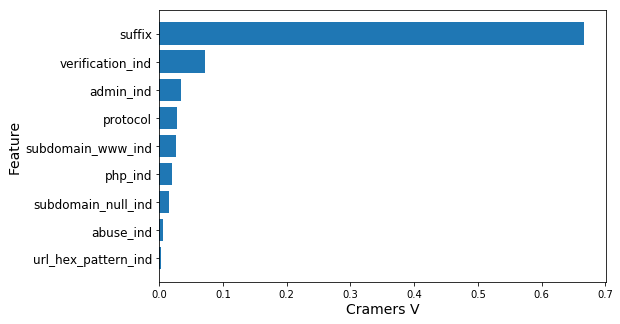

In [113]:
res_list = [[x[0], x[1][2]] for x in list(chi2_dict.items())]
res_list.sort(key=lambda x: x[-1])
ns = range(len(res_list))
labels = [x[0] for x in res_list]
data = [x[1] for x in res_list]

plt.figure(figsize=(8, 5))
plt.barh(ns, data)
plt.ylabel('Feature', fontsize=14)
plt.yticks(ns, labels, fontsize=12)
plt.xlabel('Cramers V', fontsize=14);

### Investigate Suffix

In [48]:
col1 = 'suffix'
col2 = target

crosstab = pd.crosstab(df[col1], df[col2])
crosstab

label,benign,phishing
suffix,,
,0,29
COM,2,0
ac.id,0,5
ac.ke,0,1
ac.th,0,8
ae,0,1
ai,0,1
al,0,1
am,0,1


In [49]:
len(crosstab)

148

In [59]:
crosstab[100:]

label,benign,phishing
suffix,,
name,0,1
net,0,73
nl,0,2
nu,0,1
online,0,1
org,0,34
org.au,0,2
org.br,0,1
org.in,0,1


In [60]:
good_df['suffix'].value_counts(dropna=False)

com    1488163
COM          2
Name: suffix, dtype: int64

In [118]:
bad_df['suffix'].value_counts(1, dropna=False)

com         0.554524
net         0.042343
ru          0.031903
app         0.020302
org         0.019722
com.br      0.017401
            0.016821
ly          0.011601
cn          0.009861
in          0.009861
cc          0.008701
pl          0.008701
de          0.008121
co.uk       0.007541
top         0.007541
se          0.006961
com.au      0.006961
fr          0.006381
info        0.006381
site        0.006381
com.tr      0.006381
mx          0.005800
co          0.005800
cl          0.005220
es          0.005220
ac.th       0.004640
me          0.004640
be          0.004640
it          0.004640
ml          0.004640
io          0.004060
cz          0.004060
co.za       0.003480
icu         0.003480
us          0.003480
vn          0.003480
ir          0.003480
ca          0.003480
ro          0.003480
id          0.003480
ac.id       0.002900
pro         0.002900
club        0.002900
ga          0.002900
xyz         0.002900
by          0.002320
com.ua      0.002320
asia        0

It appears I have only pulled in '.com' URLs from the CommonCrawl.
- Which index files contain other TLD's?
- Is there an efficient way to pull a subset from each of the 300+ cc_index files?
    - This would still entail downloading and extracting each of the files, which is time-consuming.

Other #TODO:
- apply lower-case 
- expand .ly URLs

In [61]:
len(df[df['suffix'] == 'ly'])

20

In [62]:
# df['short_url'] = df['url']
df['expanded_url'] = df['url']

In [65]:
ly_urls = df[df['suffix'] == 'ly']['url']
ly_urls

14836                             https://bit.ly/2MQKBAs
208559     https://bit.ly/2OJzKL6?facebook-terms-service
287099                             http://bit.ly/2QQYUZC
323251                            https://bit.ly/2sEIJob
349106                            https://bit.ly/34fyZyx
352250                            https://bit.ly/2ruvMfR
416696                            https://bit.ly/2Dco3G7
437620                           https://cutt.ly/7eKRCj8
572131     https://bit.ly/35KF2vk?facebook-terms-service
651738                            https://bit.ly/2IMaKzb
653935                          http://www.snip.ly/3kqwy
655869                           https://cutt.ly/SwdVcdy
708542                           https://cutt.ly/VeMeGSl
853901                           https://cutt.ly/KBCBank
861061                           https://cutt.ly/xeKRVFf
976246                                http://bit.ly/lTAU
1166465                            http://bit.ly/33EtKqR
1266505                        

In [64]:
ly_list = list(df[df['suffix'] == 'ly']['url'])
ly_list[0]

'https://bit.ly/2MQKBAs'

In [ ]:
df.loc[14836, 'expanded_url'] = 'https://bachkhoa144.com/wp-login.php'

In [71]:
i = 1
ly_urls[i:i+1]

208559    https://bit.ly/2OJzKL6?facebook-terms-service
Name: url, dtype: object

In [72]:
def set_expanded_url(loc, val):
    df.loc[loc, 'expanded_url'] = val 

In [73]:
set_expanded_url(208559, 'NOT VALID')

In [74]:
i = 2
ly_urls[i:i+1]

287099    http://bit.ly/2QQYUZC
Name: url, dtype: object

In [75]:
set_expanded_url(287099, 'https://compt321.blogspot.com/')

In [77]:
i = 3
ly_urls[i:i+1]

323251    https://bit.ly/2sEIJob
Name: url, dtype: object

In [78]:
set_expanded_url(323251, 'https://runandhelpfree.com/cgi-sys/suspendedpage.cgi')

In [79]:
i = 4
ly_urls[i:i+1]

349106    https://bit.ly/34fyZyx
Name: url, dtype: object

In [80]:
set_expanded_url(349106, 'https://walkshantyhobby.com/congratulate/attentive/')

In [81]:
i = 5
ly_urls[i:i+1]

352250    https://bit.ly/2ruvMfR
Name: url, dtype: object

In [82]:
set_expanded_url(352250, 'https://www.uttermost-rosenberg.com/fortunate/')

In [83]:
i = 6
ly_urls[i:i+1]

416696    https://bit.ly/2Dco3G7
Name: url, dtype: object

In [84]:
set_expanded_url(416696, 'https://lewd-furlong-clubhouse.com/doorkeeper/upsilon/')

In [85]:
i = 7
ly_urls[i:i+1]

437620    https://cutt.ly/7eKRCj8
Name: url, dtype: object

In [86]:
set_expanded_url(437620, 'https://cutt.ly/caution')

In [87]:
i = 8
ly_urls[i:i+1]

572131    https://bit.ly/35KF2vk?facebook-terms-service
Name: url, dtype: object

In [88]:
set_expanded_url(572131, 'http://5556.16mb.com/support.htm')

In [89]:
i = 9
ly_urls[i:i+1]

651738    https://bit.ly/2IMaKzb
Name: url, dtype: object

In [90]:
set_expanded_url(651738, 'https://bac-10.blogspot.com/')

In [91]:
i = 10
ly_urls[i:i+1]

653935    http://www.snip.ly/3kqwy
Name: url, dtype: object

In [92]:
set_expanded_url(653935, 'https://snip.ly/3kqwy')

In [93]:
i = 11
ly_urls[i:i+1]

655869    https://cutt.ly/SwdVcdy
Name: url, dtype: object

In [95]:
set_expanded_url(655869, 'https://app.surveymethods.com/EndUser.aspx?F0D4B8A0F8B7A0A7FB')

In [96]:
i = 12
ly_urls[i:i+1]

708542    https://cutt.ly/VeMeGSl
Name: url, dtype: object

In [97]:
set_expanded_url(708542, 'https://www.vodi.me//content/gmx/gmx.php')

In [98]:
i = 13
ly_urls[i:i+1]

853901    https://cutt.ly/KBCBank
Name: url, dtype: object

In [99]:
set_expanded_url(853901, 'https://cutt.ly/KBCBank')

### Protocol

In [107]:
col1 = 'protocol'
col2 = target

crosstab = pd.crosstab(df[col1], df[col2])
crosstab

label,benign,phishing
protocol,,
,0,1
http,536296,996
https,951869,727


In [108]:
chi_test = chi2_contingency(crosstab)
chi2 = chi_test[0]
chi2

1216.7029217621814

In [109]:
chi_test

(1216.7029217621814,
 6.256298787991566e-265,
 2,
 array([[9.98842867e-01, 1.15713318e-03],
        [5.36670282e+05, 6.21718402e+02],
        [9.51493720e+05, 1.10228044e+03]]))

## examples

In [120]:
list(good_df.sample(4)['url'].values)

['http://www.celebritieswithacne.com/201907/t20190702_16980231.htm',
 'https://cefeuskennel.com/2014/09/17/varga-ar-en-angel-nu/?replytocom=75',
 'https://www.cemnet.com/home/tags/Dangote%20Cement?page=5',
 'https://www.cccp-mult.com/shishi/article/1082025.html']

In [125]:
import sys

In [123]:
import time

In [130]:
def reporthook(count):
    global start_time
    if count == 0:
        start_time = time.time()
        return
    duration = time.time() - start_time
    sys.stdout.write("\r...%d seconds passed" % (duration))
    sys.stdout.flush()

In [131]:
for i in range(5):
    reporthook(i)
    time.sleep(2)

...8 seconds passed

In [132]:
import urllib

In [ ]:
urllib.request.urlretrieve()